In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('New Year sales Data.csv',encoding='unicode_escape')

In [5]:
df.shape #rows columns 

(11253, 14)

In [8]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,Country,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903.0,Rimi,P00125942,F,26-35,28.0,0.0,Bangladesh,Healthcare,Auto,1.0,23952.0,NaN,NaN
1,1000732.0,Karim,P00110942,F,26-35,35.0,1.0,India,Govt,Auto,3.0,23934.0,NaN,NaN
2,1001990.0,Bindu,P00118542,F,26-35,35.0,1.0,pakistan,Automobile,Auto,3.0,23924.0,NaN,NaN
3,1001425.0,Suravi,P00237842,M,0-17,16.0,0.0,Bangladesh,Construction,Auto,2.0,23912.0,NaN,NaN
4,1000588.0,Joni,P00057942,M,26-35,28.0,1.0,Japan,Food Processing,Auto,2.0,23877.0,NaN,NaN


In [9]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,Country,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11248,1001209.0,Oshin,P00201342,F,36-45,40.0,0.0,Germany,Textile,Office,4.0,213.0,NaN,NaN
11249,1004023.0,Noonan,P00059442,M,36-45,37.0,0.0,Germany,Agriculture,Office,3.0,206.0,NaN,NaN
11250,1002744.0,Brumley,P00281742,F,18-25,19.0,0.0,Mexico,Healthcare,Office,3.0,188.0,NaN,NaN
11251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11253 entries, 0 to 11252
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  float64
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  float64
 6   Marital_Status    11251 non-null  float64
 7   Country           11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  float64
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  unnamed1          0 non-null      float64
dtypes: float64(7), object(7)
memory usage: 1.2+ MB


In [19]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [21]:
pd.isnull(df).sum()

User_ID              2
Cust_name            2
Product_ID           2
Gender               2
Age Group            2
Age                  2
Marital_Status       2
Country              2
Occupation           2
Product_Category     2
Orders               2
Amount              14
dtype: int64

In [22]:
df.dropna(inplace=True) # drop null values

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           0 non-null      float64
 1   Cust_name         0 non-null      object 
 2   Product_ID        0 non-null      object 
 3   Gender            0 non-null      object 
 4   Age Group         0 non-null      object 
 5   Age               0 non-null      float64
 6   Marital_Status    0 non-null      float64
 7   Country           0 non-null      object 
 8   Occupation        0 non-null      object 
 9   Product_Category  0 non-null      object 
 10  Orders            0 non-null      float64
 11  Amount            0 non-null      float64
 12  Status            0 non-null      float64
 13  unnamed1          0 non-null      float64
dtypes: float64(7), object(7)
memory usage: 0.0+ bytes


In [66]:
df['Amount'] =df['Amount'].astype('int')

In [68]:
df['Amount'].dtype

dtype('int64')

In [69]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'Country', 'Occupation', 'Product_Category', 'Orders',
       'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [72]:
df.rename(columns={'Marital_Status':'Biye'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Biye,Country,Occupation,Product_Category,Orders,Amount,Status,unnamed1


In [74]:
df[['Age', 'Occupation' ,'Country']].describe()#only int countable

,Age
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [75]:
df[['Age', 'Orders', 'Amount']].describe()


,Age,Orders,Amount
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


# Exploratory Data Analysis

### Gender

<Axes: xlabel='Gender', ylabel='count'>

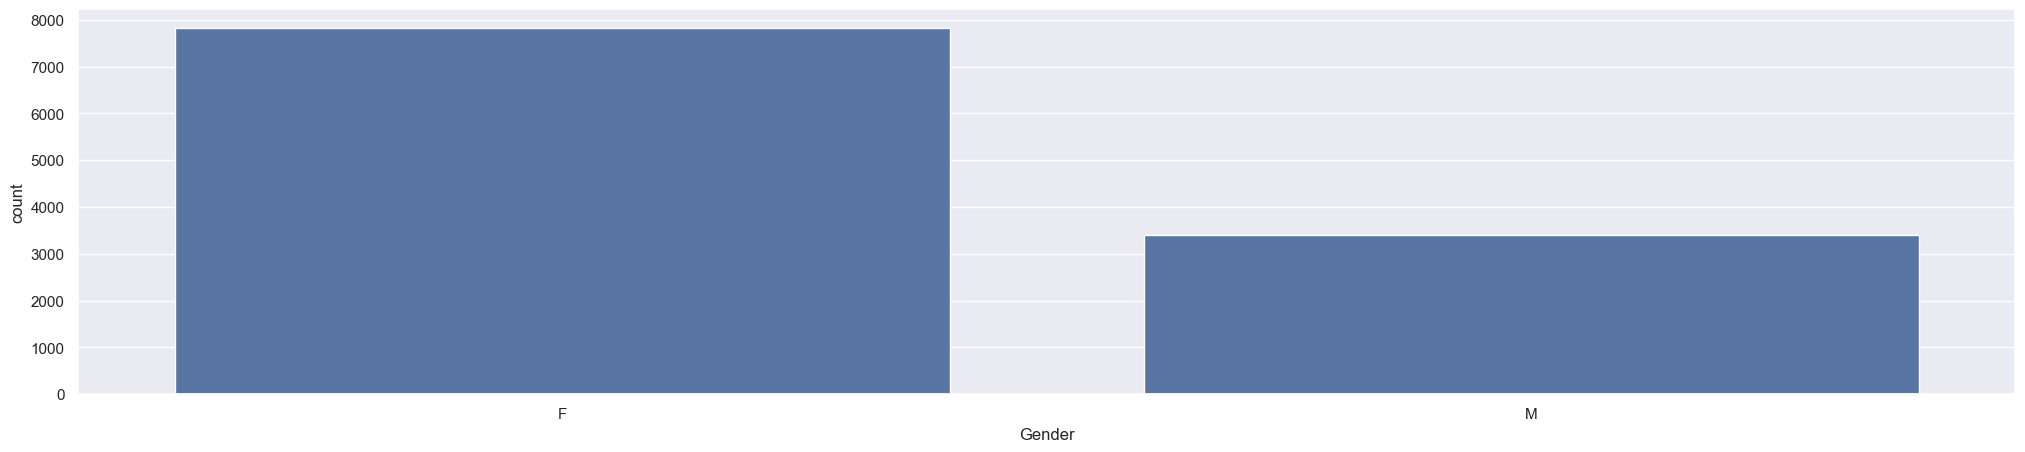

In [30]:
sns.countplot(x = 'Gender', data=df)

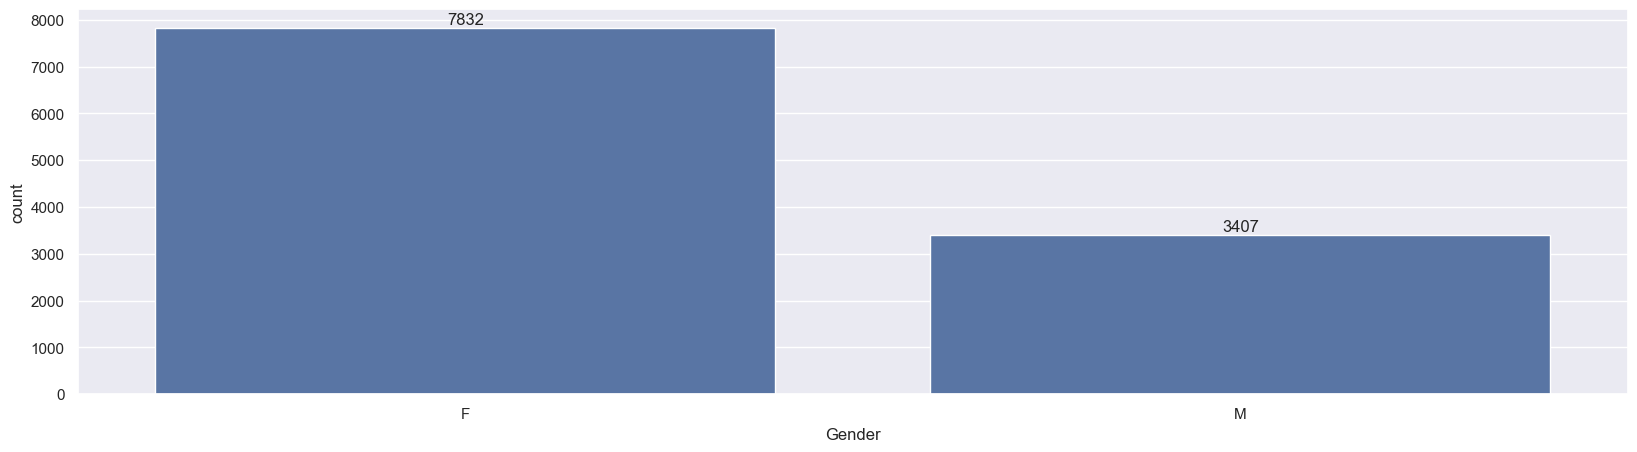

In [23]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [18]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

#total expension of each Gender

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

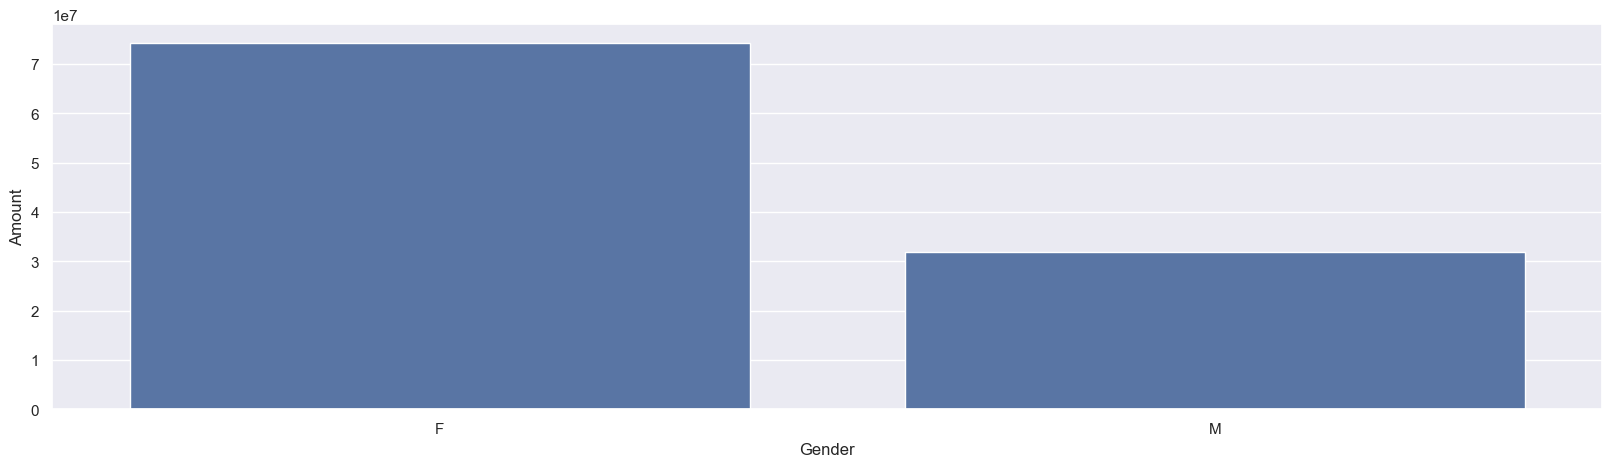

In [17]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

From  Above graph we can see most of the byers are female and spent money more than male

### Age

In [102]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'Country', 'Occupation', 'Product_Category', 'Orders',
       'Amount', 'Status', 'unnamed1'],
      dtype='object')

<Axes: xlabel='Age Group', ylabel='count'>

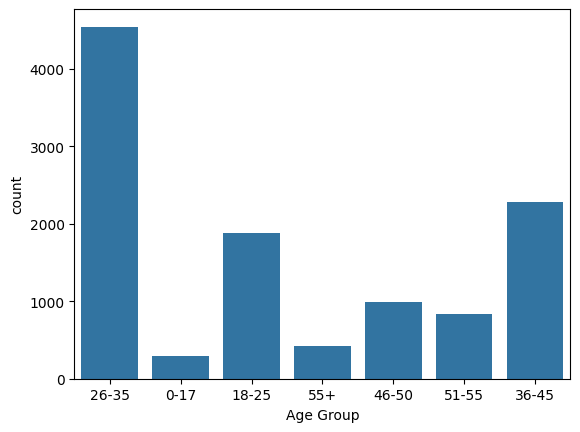

In [111]:
sns.countplot(data=df , x= 'Age Group')

#withouth hue cant see Gender defference
#count mean which group has how many prople

<Axes: xlabel='Age Group', ylabel='count'>

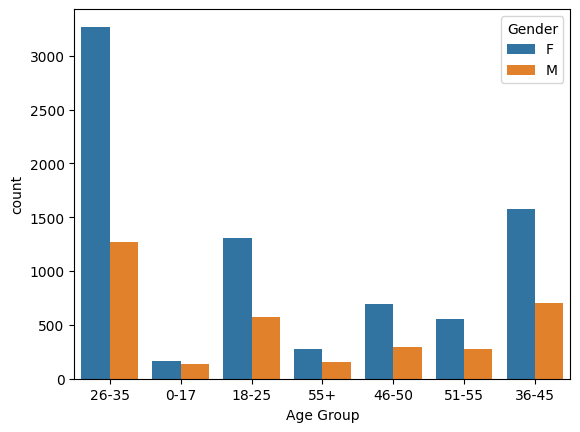

In [104]:
sns.countplot(data=df , x= 'Age Group' ,hue ='Gender')

#hue is for divide the age group in male and female
#count mean which group has how many prople

<Axes: xlabel='Age Group', ylabel='Amount'>

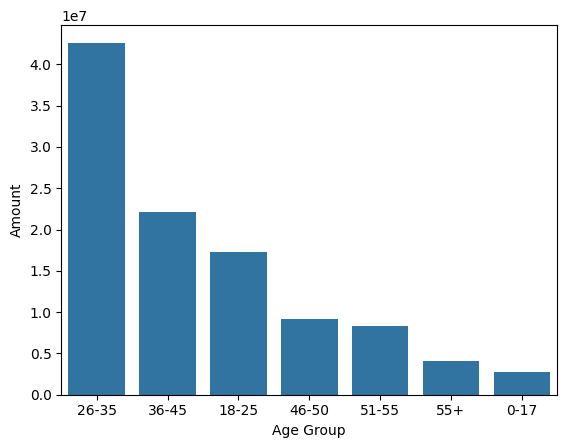

In [110]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

#amount means spent of money..whhich group has spent much

*From the graph we can see most of the byers of age group 26-35 are female*


### country


In [112]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'Country', 'Occupation', 'Product_Category', 'Orders',
       'Amount', 'Status', 'unnamed1'],
      dtype='object')

<Axes: xlabel='Country', ylabel='Orders'>

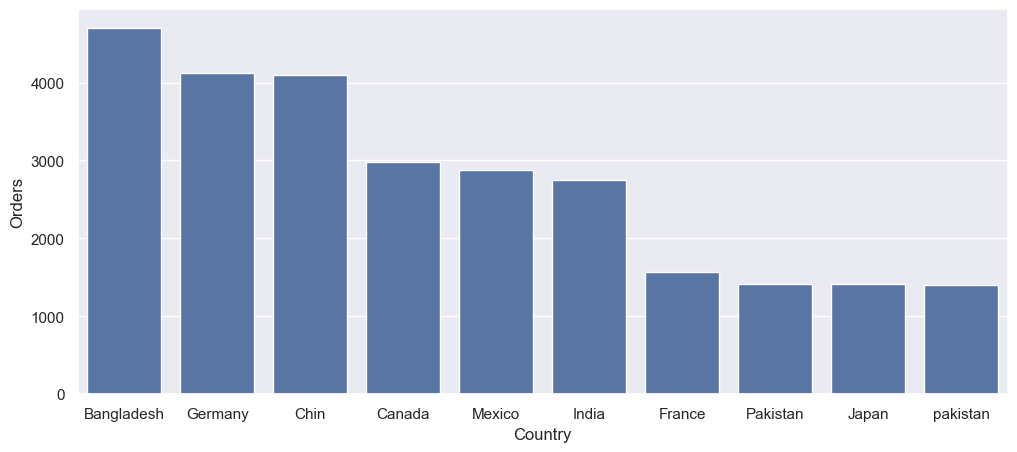

In [122]:
sales_country =df.groupby(['Country'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
#head is for top (country) showing
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(data = sales_country, x = 'Country',y= 'Orders')

<Axes: xlabel='Marital_Status', ylabel='count'>

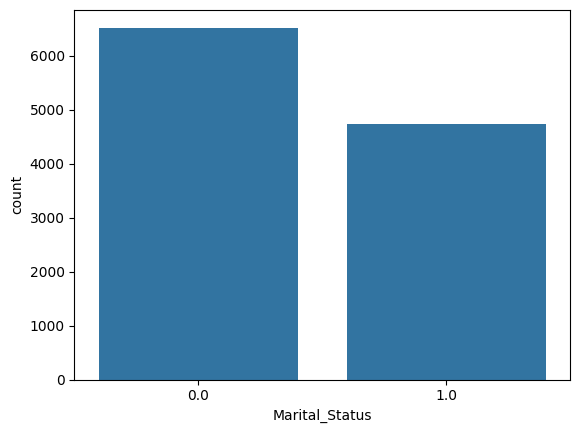

In [109]:
sns.countplot(data=df ,x='Marital_Status')

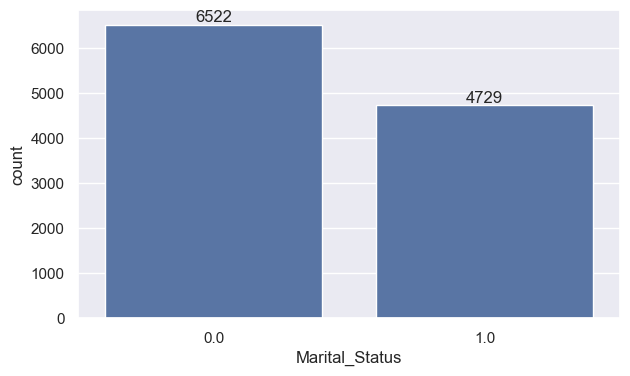

In [124]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(5,4)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

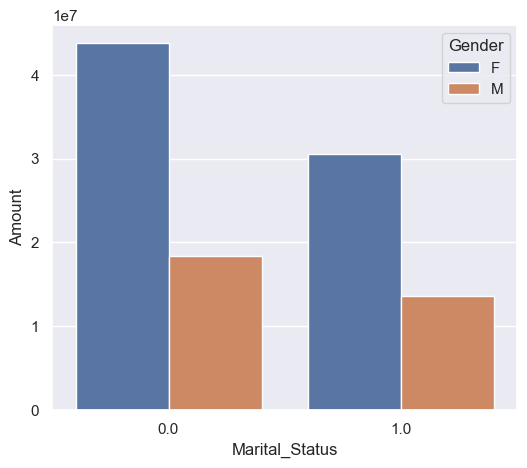

In [125]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')


*From above graph we can see that most of the buyers are married women*

### Occupation

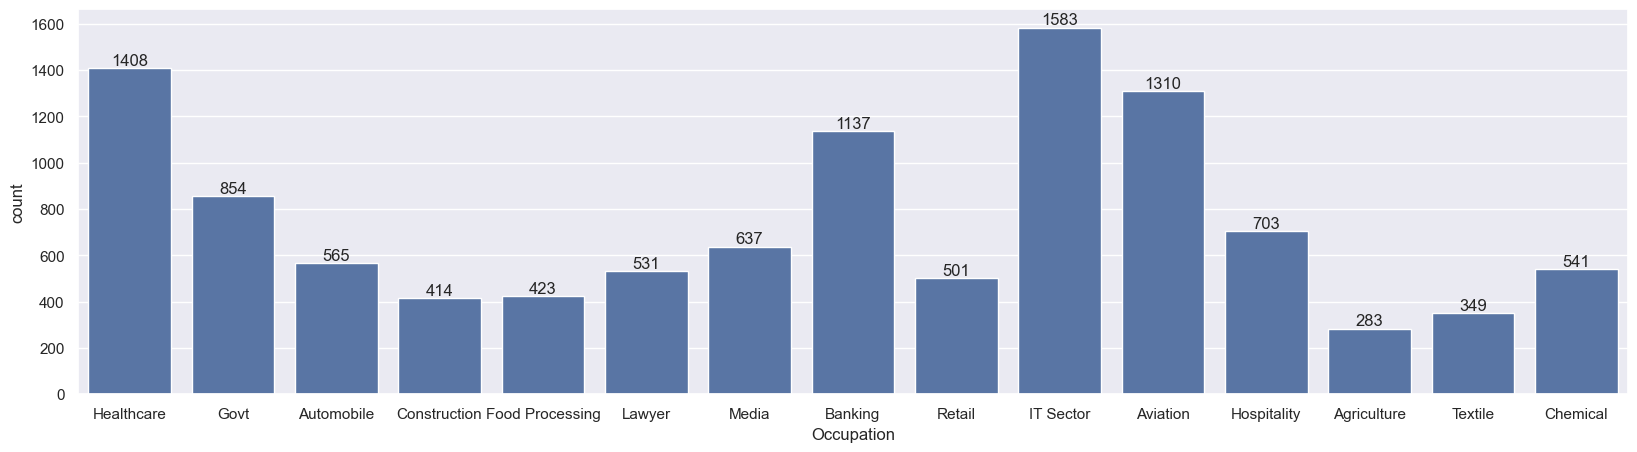

In [24]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

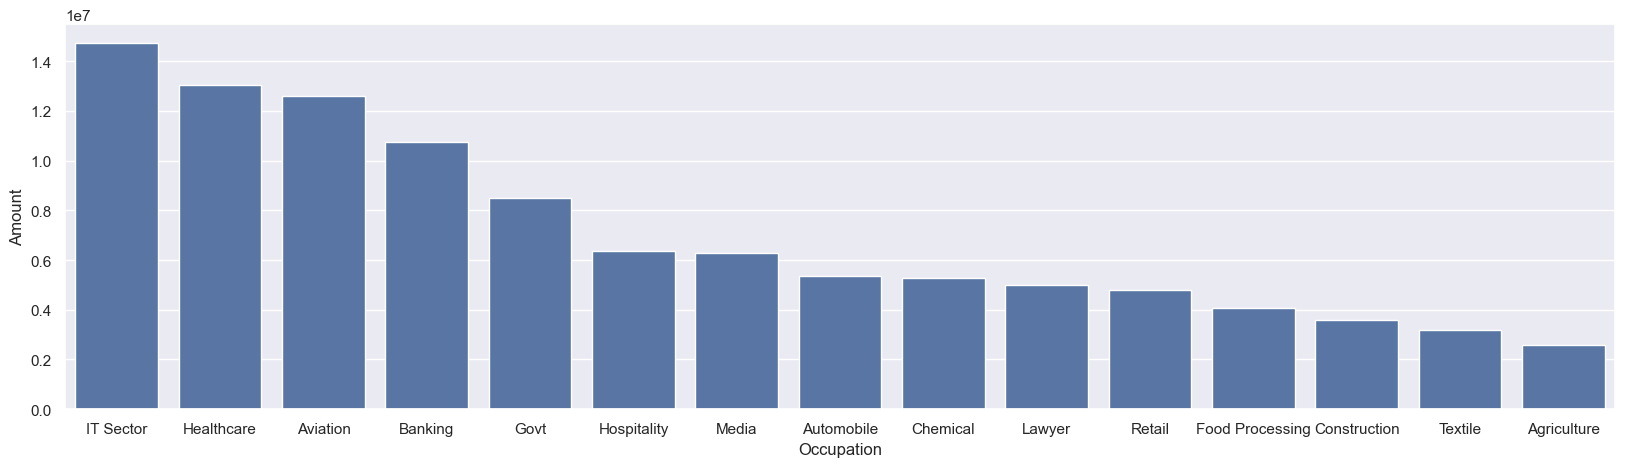

In [25]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT  sector*

### Product category

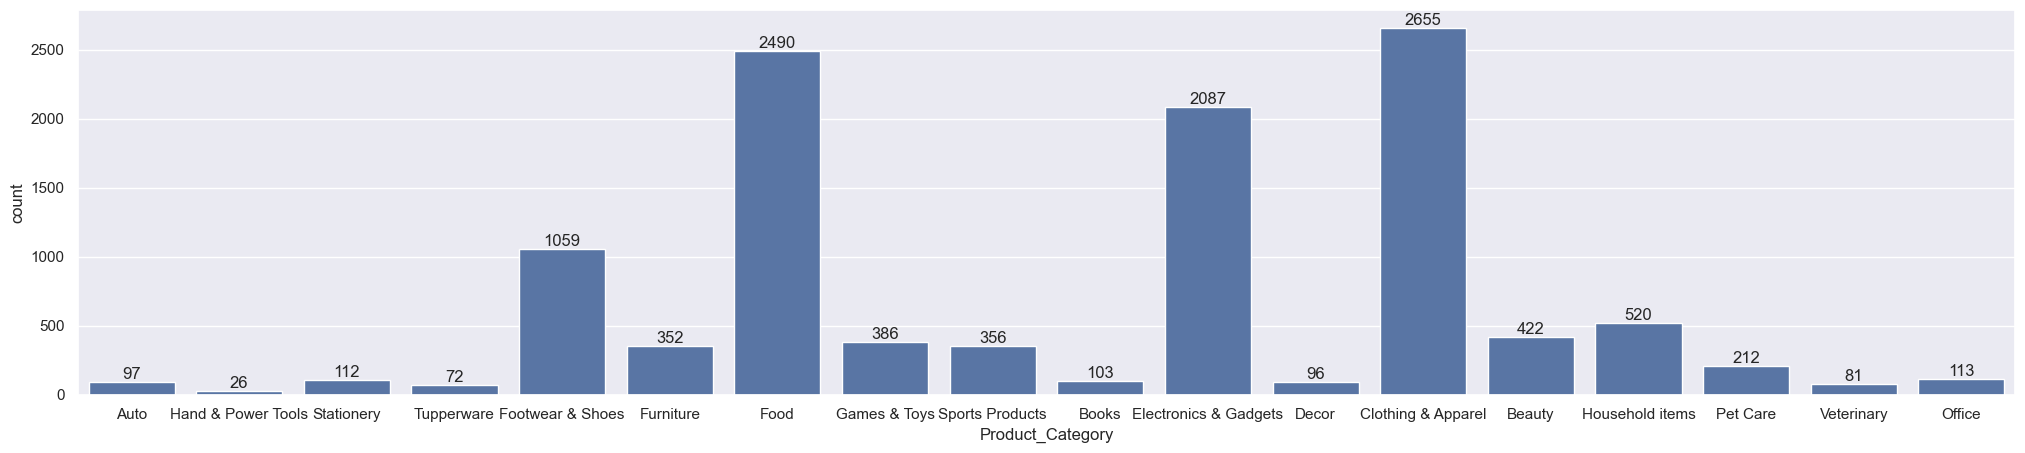

In [29]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

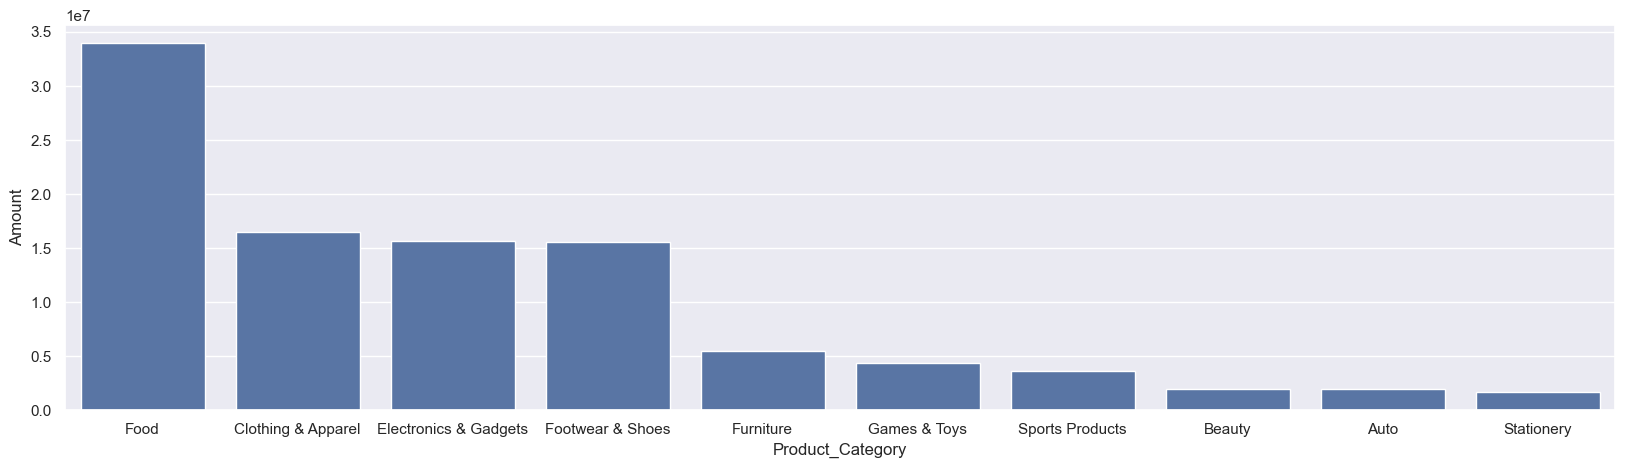

In [129]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

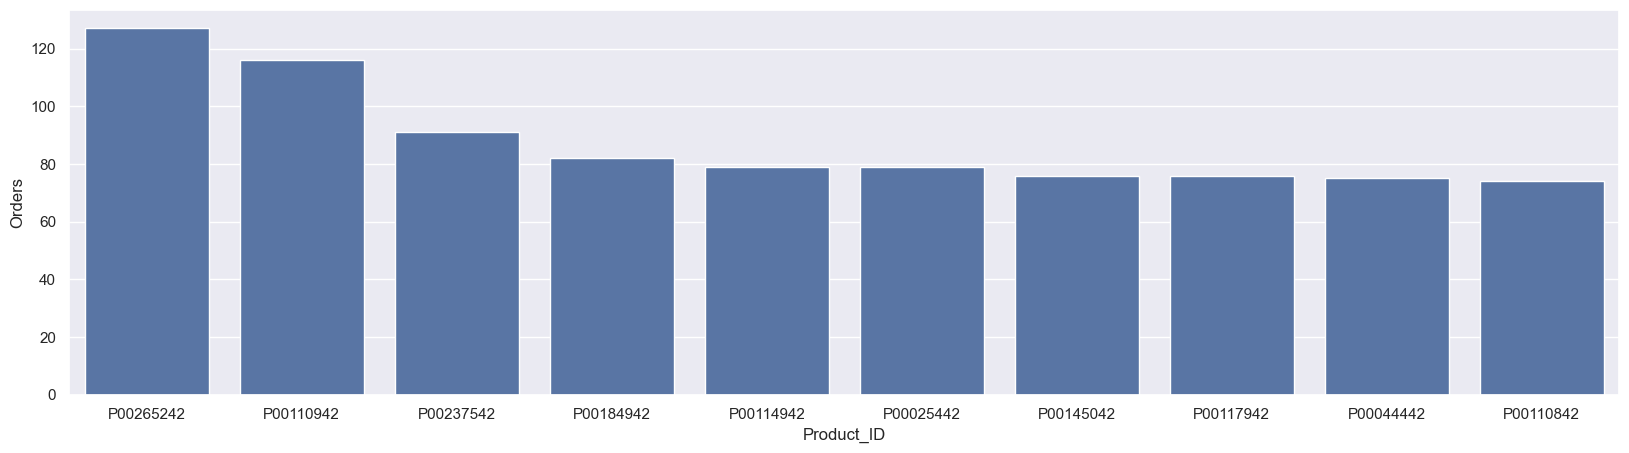

In [9]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')


<Axes: xlabel='Product_ID'>

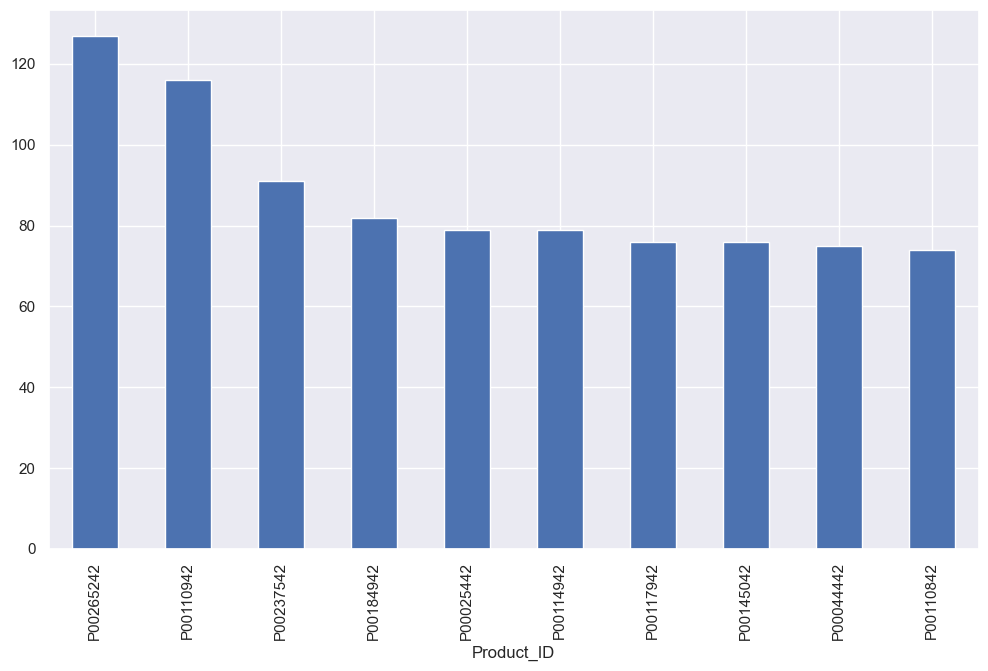

In [8]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion 

###  Married women age group 26-35 yrs from Bangladesh,Germany working in IT, Healthcare  are more likely to buy products from Food, Clothing and Electronics category